In [1]:
import numpy as np
import pandas as pd
import random as random
import matplotlib.pyplot as plt
from datetime import datetime
import wrds
import warnings
from scipy import stats
warnings.simplefilter(action='ignore', category=FutureWarning)

db = wrds.Connection(wrds_username = 'anita97') # or hienle

Enter your WRDS username [anita]: anita97
Enter your password: ············


WRDS recommends setting up a .pgpass file.
You can find more info here:
https://www.postgresql.org/docs/9.5/static/libpq-pgpass.html.
Loading library list...
Done


In [2]:
s = db.raw_sql("select a.permno, a.date, \
                  a.ret, a.shrout, a.prc \
                  from crsp.msf as a \
                  join crsp.msenames as b \
                  on a.permno = b.permno and b.namedt<=a.date \
                  and a.date<=b.nameendt \
                  where b.shrcd between (10) and (11)and \
                  a.date >='2000-01-01' and a.date<='2019-12-31'\
                  and b.exchcd between 1 and 2")

s.to_csv('as6.csv')
stocks = pd.read_csv('as6.csv', index_col=0) # read the file

stocks.head()

,permno,date,ret,shrout,prc
0,10042.0,2000-01-31,-0.200000,46497.0,0.250
1,10051.0,2000-01-31,-0.550000,19084.0,4.500
2,10066.0,2000-01-31,-0.200000,28258.0,2.000
3,10085.0,2000-01-31,-0.065089,46404.0,9.875
4,10108.0,2000-01-31,0.221053,128237.0,29.000


In [4]:
import yfinance as yf

msft = yf.Ticker("PFE")

# get stock info
msft.info

# get historical market data
#hist = msft.history(period="max")
hist = msft.history(start="2020-01-01")

In [3]:
d 

Attributes   Adj Close                              Close             \
Symbols             BA        AMD        AAPL          BA        AMD   
Date                                                                   
2020-01-02  331.348572  49.099998   73.840042  333.320007  49.099998   
2020-01-03  330.791901  48.599998   73.122154  332.760010  48.599998   
2020-01-06  331.766083  48.389999   73.704819  333.739990  48.389999   
2020-01-07  335.285156  48.250000   73.358185  337.279999  48.250000   
2020-01-08  329.410095  47.830002   74.538239  331.369995  47.830002   
...                ...        ...         ...         ...        ...   
2020-11-24  218.490005  85.070000  115.169998  218.490005  85.070000   
2020-11-25  217.610001  86.709999  116.029999  217.610001  86.709999   
2020-11-27  216.500000  87.190002  116.589996  216.500000  87.190002   
2020-11-30  210.710007  92.660004  119.050003  210.710007  92.660004   
2020-12-01  213.009995  92.629997  122.720001  213.009995  92.629997   

Attributes                    High                                Low  \
Symbols           AAPL          BA        AMD        AAPL          BA   
Date                                                                    
2020-01-02   75.087502  333.350006  49.250000   75.150002  327.700012   
2020-01-03   74.357498  334.890015  49.389999   75.144997  330.299988   
2020-01-06   74.949997  334.859985  48.860001   74.989998  327.880005   
2020-01-07   74.597504  344.190002  49.389999   75.224998  330.709991   
2020-01-08   75.797501  334.029999  48.299999   76.110001  329.600006   
...                ...         ...        ...         ...         ...   
2020-11-24  115.169998  222.949997  86.110001  115.849998  215.759995   
2020-11-25  116.029999  221.000000  87.839996  116.750000  213.089996   
2020-11-27  116.589996  219.929993  88.000000  117.489998  216.039993   
2020-11-30  119.050003  217.779999  92.739998  120.970001  208.520004   
2020-12-01  122.720001  218.080002  93.889999  123.469299  213.000000   

Attributes                               Open                         \
Symbols           AMD        AAPL          BA        AMD        AAPL   
Date                                                                   
2020-01-02  46.630001   73.797501  328.549988  46.860001   74.059998   
2020-01-03  47.540001   74.125000  330.630005  48.029999   74.287498   
2020-01-06  47.860001   73.187500  329.299988  48.020000   73.447502   
2020-01-07  48.040001   74.370003  334.260010  49.349998   74.959999   
2020-01-08  47.139999   74.290001  332.399994  47.849998   74.290001   
...               ...         ...         ...        ...         ...   
2020-11-24  83.320000  112.589996  219.429993  85.720001  113.910004   
2020-11-25  85.519997  115.169998  217.710007  85.760002  115.550003   
2020-11-27  86.360001  116.220001  218.250000  87.989998  116.570000   
2020-11-30  86.529999  116.809998  215.699997  87.330002  116.970001   
2020-12-01  90.779999  120.010002  214.309998  92.250000  121.010002   

Attributes      Volume                           
Symbols             BA         AMD         AAPL  
Date                                             
2020-01-02   4544400.0  80331100.0  135480400.0  
2020-01-03   3875900.0  73127400.0  146322800.0  
2020-01-06   5355000.0  47934900.0  118387200.0  
2020-01-07   9898600.0  58061400.0  108872000.0  
2020-01-08   8239200.0  53767000.0  132079200.0  
...                ...         ...          ...  
2020-11-24  31132000.0  36839200.0  113874200.0  
2020-11-25  19254100.0  41349700.0   76499200.0  
2020-11-27   9970200.0  22717600.0   46691300.0  
2020-11-30  16436500.0  84217200.0  168902700.0  
2020-12-01  15110939.0  57375197.0  121958626.0  

[232 rows x 18 columns]

In [2]:
hist

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2019-12-31,35.358276,35.732001,35.285354,35.713772,15175700,0.0,0.0
2020-01-02,35.823155,35.868733,35.440315,35.677311,16514100,0.0,0.0
2020-01-03,35.294467,35.768463,35.248889,35.485886,14922800,0.0,0.0
2020-01-06,35.385623,35.549697,35.276238,35.440315,15772000,0.0,0.0
2020-01-07,35.659082,35.668197,35.258008,35.321815,20108100,0.0,0.0
...,...,...,...,...,...,...,...
2020-11-24,36.130001,36.740002,36.020000,36.599998,42485300,0.0,0.0
2020-11-25,36.529999,36.560001,36.240002,36.529999,26955800,0.0,0.0
2020-11-27,36.779999,37.259998,36.750000,37.230000,25277000,0.0,0.0


<AxesSubplot:xlabel='Date'>

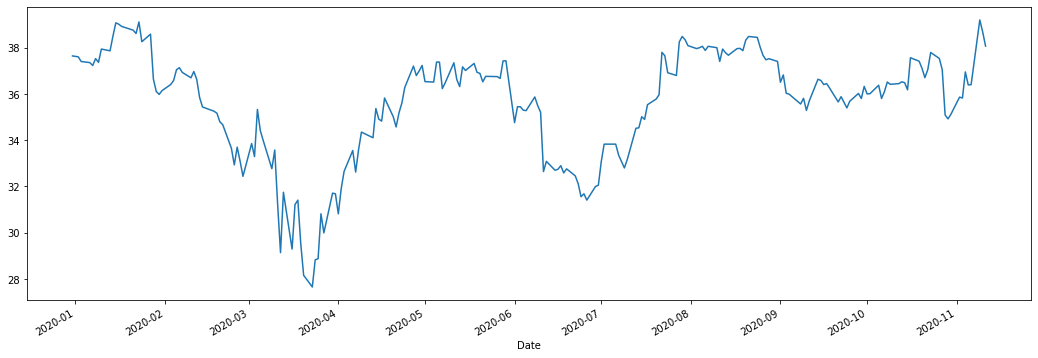

In [23]:
hist["Close"].plot(figsize=(18, 6))

<AxesSubplot:xlabel='Date'>

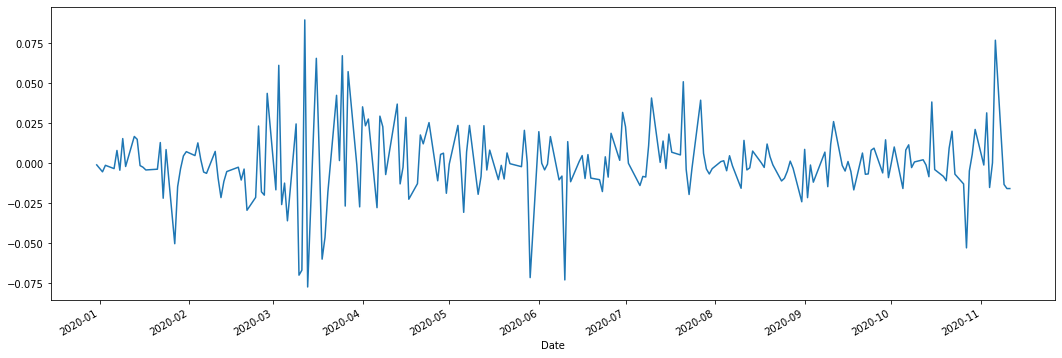

In [24]:
returnm = (hist.Close[1:].values - hist.Close[:-1].values)/hist.Close[:-1].values
returnm = np.append(returnm, returnm[-1])
hist['returnm'] = returnm
hist['returnm'].plot(figsize=(18, 6))

In [23]:
import pyEX

TOKEN_FILENAME = "token.txt"

with open(TOKEN_FILENAME) as f:
    production_token = f.readline().strip()
    test_token = f.readline().strip()

testing = True

if testing:
    c = pyEX.Client(api_token=test_token, version='sandbox')
else:
    c = pyEX.Client(api_token=production_token)

In [24]:
df = c.intradayDF('AAPL')

In [25]:
df.head()

label    high      low    open    close  average  \
date       minute                                                        
2020-11-11 09:30   09:30 AM  119.96  119.300  122.22  117.700  118.497   
           09:31   09:31 AM  121.43  120.350  117.43  120.160  121.981   
           09:32   09:32 AM  122.38  120.532  118.69  121.600  117.470   
           09:33   09:33 AM  117.94  117.519  121.70  120.280  118.280   
           09:34   09:34 AM  122.42  120.480  122.54  118.664  120.646   

                   volume     notional  numberOfTrades  
date       minute                                       
2020-11-11 09:30    36016  4164873.270             166  
           09:31    14104  1653036.100             101  
           09:32     2672   316558.723              40  
           09:33     3325   405601.478              46  
           09:34    10066  1166465.734              86